In [232]:
import os
from xml.etree import ElementTree
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp

In [233]:
full_file_poss1 = "C:/Users/ssoun/Desktop/StatsPerform/ManUtdvLei.xml"

In [234]:
def GetXY(path):
    lst = []
    dom = ElementTree.parse(path)
    myRoot = dom.getroot()
    for x in myRoot[0]:
        if int(x.attrib['team_id']) == 1:
            if 'player_id' in x.attrib.keys():
                if (float(x.attrib['x']) < 0) or (float(x.attrib['y']) < 0):
                    pass
                else:
                    heat_dict = {}
                    heat_dict['player_id'] = x.attrib['player_id']

                    heat_dict['X'] = float(x.attrib['x'])
                    heat_dict['Y'] = float(x.attrib['y'])
                    time = ((x.attrib['timestamp']).split("T")[1]).split(":")
                    heat_dict['timestamp'] = float(''.join(time))
                    lst.append(heat_dict)
            else:
                pass

    lst.sort(key=lambda x: x['timestamp'])
    return lst

In [235]:
full_file_player1 = "C:/Users/ssoun/Desktop/StatsPerform/ManUtdvLei_player.xml"

def GetPlayers(path):
    dom = ElementTree.parse(path)
    myRoot = dom.getroot()
    lst = []
    for x in myRoot[0]:
        
        try:
            if x.attrib['uID'] == 't1':
                children = x.getchildren()
                
                for child in children:
                    dict = {}
                    try:
                        #print(child.attrib['uID'][1:])
                        dict['player_id'] = child.attrib['uID'][1:]
                    except:
                        pass
                    ch = child.getchildren()
                    for c in ch:
                        #print(c.getchildren()[0].text)
                        dict['Name'] = c.getchildren()[0].text + ' ' + c.getchildren()[1].text
                        lst.append(dict)
                        
        except:
            pass
        
    return lst


In [236]:
Players_Lei = GetPlayers(full_file_player1)[:-1]
print(Players_Lei)

[{'player_id': '51940', 'Name': 'David de Gea'}, {'player_id': '106760', 'Name': 'Luke Shaw'}, {'player_id': '40002', 'Name': 'Matteo Darmian'}, {'player_id': '197365', 'Name': 'Eric Bailly'}, {'player_id': '184667', 'Name': 'Victor Lindelöf'}, {'player_id': '101582', 'Name': 'Frederico Fred'}, {'player_id': '156689', 'Name': 'Andreas Hugo Andreas Pereira'}, {'player_id': '74208', 'Name': 'Paul Pogba'}, {'player_id': '37265', 'Name': 'Alexis Sánchez'}, {'player_id': '176297', 'Name': 'Marcus Rashford'}, {'player_id': '43670', 'Name': 'Juan Mata'}, {'player_id': '66749', 'Name': 'Romelu Lukaku'}, {'player_id': '55909', 'Name': 'Chris Smalling'}, {'player_id': '148225', 'Name': 'Anthony Martial'}, {'player_id': '18892', 'Name': 'Ashley Young'}, {'player_id': '41184', 'Name': 'Marouane Fellaini'}, {'player_id': '195851', 'Name': 'Scott McTominay'}, {'player_id': '6744', 'Name': 'Lee Grant'}]


c:\users\ssoun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  # This is added back by InteractiveShellApp.init_path()
c:\users\ssoun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
c:\users\ssoun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


In [237]:
Leicester = GetXY(full_file_poss1)
print(Leicester)

[{'player_id': '43670', 'X': 43.7, 'Y': 22.1, 'timestamp': 200014.191}, {'player_id': '43670', 'X': 27.2, 'Y': 14.9, 'timestamp': 200015.201}, {'player_id': '156689', 'X': 35.4, 'Y': 36.1, 'timestamp': 200017.447}, {'player_id': '156689', 'X': 38.8, 'Y': 47.2, 'timestamp': 200019.157}, {'player_id': '106760', 'X': 33.5, 'Y': 93.9, 'timestamp': 200023.83}, {'player_id': '74208', 'X': 30.8, 'Y': 80.8, 'timestamp': 200025.406}, {'player_id': '106760', 'X': 25.1, 'Y': 93.8, 'timestamp': 200027.701}, {'player_id': '184667', 'X': 10.8, 'Y': 84.2, 'timestamp': 200030.581}, {'player_id': '51940', 'X': 3.1, 'Y': 49.9, 'timestamp': 200037.398}, {'player_id': '184667', 'X': 15.7, 'Y': 93.9, 'timestamp': 200041.661}, {'player_id': '106760', 'X': 28.3, 'Y': 96.9, 'timestamp': 200043.557}, {'player_id': '74208', 'X': 24.1, 'Y': 75.9, 'timestamp': 200045.165}, {'player_id': '40002', 'X': 77.4, 'Y': 9.1, 'timestamp': 200053.462}, {'player_id': '101582', 'X': 68.0, 'Y': 7.6, 'timestamp': 200058.141}, {

In [7]:
df_position = pd.DataFrame(Leicester)
print(df_position.shape)
df_position.head()

(854, 4)


,player_id,X,Y,timestamp
0,43670,43.7,22.1,200014.191
1,43670,27.2,14.9,200015.201
2,156689,35.4,36.1,200017.447
3,156689,38.8,47.2,200019.157
4,106760,33.5,93.9,200023.830


In [85]:
df_position['player_id'].value_counts()

106760    118
74208     107
156689     96
101582     85
43670      85
37265      79
40002      64
184667     58
176297     48
197365     45
51940      37
66749      14
195851     11
41184       7
Name: player_id, dtype: int64

In [9]:
df_players = pd.DataFrame(Players_Lei)
df_players

,player_id,Name
0,51940,David de Gea
1,106760,Luke Shaw
2,40002,Matteo Darmian
3,197365,Eric Bailly
4,184667,Victor Lindelöf
5,101582,Frederico Fred
6,156689,Andreas Hugo Andreas Pereira
7,74208,Paul Pogba
8,37265,Alexis Sánchez
9,176297,Marcus Rashford


<Figure size 540x360 with 0 Axes>

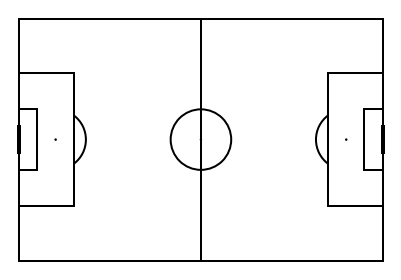

In [221]:
from mplsoccer.pitch import Pitch

fig=plt.figure()
fig.set_size_inches(7.5, 5)
pitch = Pitch(pitch_color='white', line_color='black', stripe=False)
fig, ax = pitch.draw()

c:\users\ssoun\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


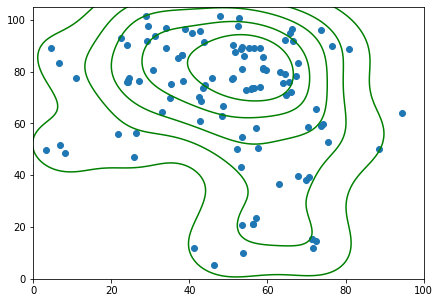

In [100]:
import numpy as np
import seaborn as sns

fig=plt.figure()
fig.set_size_inches(7, 5)

x = df_position.loc[df_position['player_id'] == '74208']['X'].to_numpy()
y = df_position.loc[df_position['player_id'] == '74208']['Y'].to_numpy()
plt.xlim(0, 100)
plt.ylim(0, 105)
plt.scatter(x, y)
cont = sns.kdeplot(x, y, color = "green", levels = 6, thresh=0.1)

plt.show()


In [101]:
from sklearn.cluster import DBSCAN

X = np.column_stack((x, y))
clustering = DBSCAN(eps=10, min_samples=12).fit(X)

In [102]:
clusters = X[clustering.labels_ != -1]
print(clusters[:,1])

[80.8 75.9 73.6 86.2 96.9 91.7 73.8 73.3 97.8 89.3 74.1 87.6 91.6 77.4
 77.5 81.1 72.9 77.4 77.3 75.9 76.9 96.4 76.3 75.6 81.5 80.6 85.6 89.3
 70.9 65.5 66.6 74.7 79.  80.9 75.9 72.1 76.6 95.7 90.3 86.6 86.6 73.9
 75.1 85.4 94.8 92.  83.4 92.4 89.7 89.  78.5 79.7 97.5 89.3 95.1 88.6
 93.8]


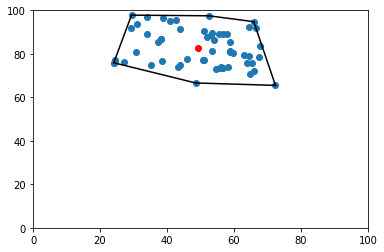

In [104]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
hull = ConvexHull(clusters)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(clusters[:,0], clusters[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(clusters[simplex, 0], clusters[simplex, 1], 'k-')
plt.plot(np.mean(clusters[:,0]) , np.mean(clusters[:,1]),'ro') 

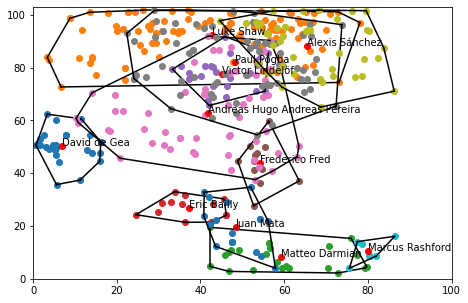

In [78]:
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from scipy import stats

fig=plt.figure()
fig.set_size_inches(7.5, 5)
plt.xlim(0, 100)
plt.ylim(0, 103)

#len_clusters = []

for p in Players_Lei:
    x = df_position.loc[df_position['player_id'] == p['player_id']]['X'].to_numpy()
    y = df_position.loc[df_position['player_id'] == p['player_id']]['Y'].to_numpy()
    if len(x) < 30:
        pass
    else:
        X = np.column_stack((x, y))
        model = DBSCAN(eps=10, min_samples=7).fit(X)
        #clusters = X[model.labels_ != -1]
        labels = list(model.labels_)
        labels = list(filter(lambda a: a != -1, labels))
        labels = np.array(labels) 
        maxEle = np.bincount(labels).argmax()
        clusters = X[model.labels_ == maxEle]
        hull = ConvexHull(clusters)
        plt.plot(clusters[:,0], clusters[:,1], 'o')
        plt.plot(np.mean(clusters[:,0]) , np.mean(clusters[:,1]),'ro') 
        plt.annotate(p['Name'], (np.mean(clusters[:,0]), np.mean(clusters[:,1])))
        for simplex in hull.simplices:
            plt.plot(clusters[simplex, 0], clusters[simplex, 1], 'k-')
        
    
plt.show()

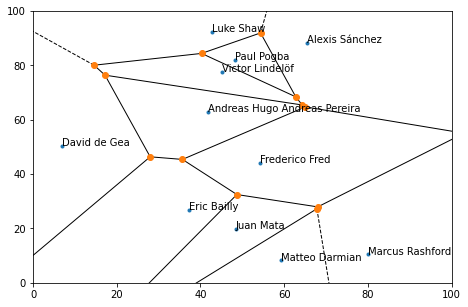

In [98]:
from scipy.spatial import Voronoi, voronoi_plot_2d

fig=plt.figure()
fig.set_size_inches(7.5, 5)
ax = fig.add_subplot(111)
plt.xlim([0,1]), plt.ylim([0,1])

#len_clusters = []
pointsX = []
pointsY = []
for p in Players_Lei:
    x = df_position.loc[df_position['player_id'] == p['player_id']]['X'].to_numpy()
    y = df_position.loc[df_position['player_id'] == p['player_id']]['Y'].to_numpy()
    if len(x) < 30:
        pass
    else:
        X = np.column_stack((x, y))
        model = DBSCAN(eps=10, min_samples=7).fit(X)
        #clusters = X[model.labels_ != -1]
        labels = list(model.labels_)
        labels = list(filter(lambda a: a != -1, labels))
        labels = np.array(labels) 
        maxEle = np.bincount(labels).argmax()
        clusters = X[model.labels_ == maxEle]
        #plt.plot(np.mean(clusters[:,0]) , np.mean(clusters[:,1]),'ro') 
        plt.annotate(p['Name'], (np.mean(clusters[:,0]), np.mean(clusters[:,1])))
        pointsX.append(np.mean(clusters[:,0]))
        pointsY.append(np.mean(clusters[:,1]))
        #vor = Voronoi(points)

points = np.column_stack((pointsX, pointsY))
#points = np.append(points, [[90,90], [90,0]], axis = 0)
#print(points)
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, ax=ax)
plt.xlim([0,100]), plt.ylim([0,100])
plt.show()

In [238]:
full_file_poss2 = "C:/Users/ssoun/Desktop/StatsPerform/ManUtdvBrighton.xml"
full_file_poss3 = "C:/Users/ssoun/Desktop/StatsPerform/ManUtdvSpurs.xml"
full_file_poss4 = "C:/Users/ssoun/Desktop/StatsPerform/ManUtdvBurnley.xml"

In [239]:
Brighton = GetXY(full_file_poss2)
Spurs = GetXY(full_file_poss3)
Burnley = GetXY(full_file_poss4)

In [240]:
ManUtd_poss = Leicester + Brighton + Spurs + Burnley
print(len(ManUtd_poss))

3497


In [241]:
df_manUtd_poss = pd.DataFrame(ManUtd_poss)
print(df_manUtd_poss)
df_manUtd_poss.head()

     player_id     X      Y   timestamp
0        43670  43.7   22.1  200014.191
1        43670  27.2   14.9  200015.201
2       156689  35.4   36.1  200017.447
3       156689  38.8   47.2  200019.157
4       106760  33.5   93.9  200023.830
...        ...   ...    ...         ...
3492     20695  23.5    4.0  175132.750
3493    197365  21.6   19.7  175133.892
3494    106760  12.2   61.7  175203.293
3495    106760  12.2   61.7  175203.683
3496    106760  15.4  101.6  175204.879

[3497 rows x 4 columns]


,player_id,X,Y,timestamp
0,43670,43.7,22.1,200014.191
1,43670,27.2,14.9,200015.201
2,156689,35.4,36.1,200017.447
3,156689,38.8,47.2,200019.157
4,106760,33.5,93.9,200023.830


In [242]:
df_manUtd_poss['player_id'].value_counts()

74208     420
106760    413
101582    295
184667    274
51940     184
37265     173
109322    165
41184     163
66749     158
62398     148
20695     146
55909     144
156689    138
197365    137
43670     110
176297    103
18892     100
40002      64
59846      55
76359      52
148225     44
195851     11
Name: player_id, dtype: int64

In [243]:
full_file_player2 = "C:/Users/ssoun/Desktop/StatsPerform/ManUtdvBrighton_player.xml"
full_file_player3 = "C:/Users/ssoun/Desktop/StatsPerform/ManUtdvSpurs_player.xml"
full_file_player4 = "C:/Users/ssoun/Desktop/StatsPerform/ManUtdvBurnley_player.xml"

In [245]:
Players_Spurs = GetPlayers(full_file_player3)[:-1]
print(Players_Spurs)

[{'player_id': '51940', 'Name': 'David De Gea'}, {'player_id': '59846', 'Name': 'Ander Herrera'}, {'player_id': '76359', 'Name': 'Phil Jones'}, {'player_id': '55909', 'Name': 'Chris Smalling'}, {'player_id': '20695', 'Name': 'Luis Antonio Antonio Valencia'}, {'player_id': '106760', 'Name': 'Luke Shaw'}, {'player_id': '101582', 'Name': 'Frederico Fred'}, {'player_id': '62398', 'Name': 'Nemanja Matic'}, {'player_id': '74208', 'Name': 'Paul Pogba'}, {'player_id': '109322', 'Name': 'Jesse Lingard'}, {'player_id': '66749', 'Name': 'Romelu Lukaku'}, {'player_id': '37265', 'Name': 'Alexis Sánchez'}, {'player_id': '176297', 'Name': 'Marcus Rashford'}, {'player_id': '184667', 'Name': 'Victor Lindelöf'}, {'player_id': '6744', 'Name': 'Lee Grant'}, {'player_id': '18892', 'Name': 'Ashley Young'}, {'player_id': '195851', 'Name': 'Scott McTominay'}, {'player_id': '41184', 'Name': 'Marouane Fellaini'}]


c:\users\ssoun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  # This is added back by InteractiveShellApp.init_path()
c:\users\ssoun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
c:\users\ssoun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


In [247]:
Players_Lei.append({'player_id': '109322', 'Name': 'Jesse Lingard'})
Players_Lei.append({'player_id': '62398', 'Name': 'Nemanja Matic'})
Players_Lei.append({'player_id': '20695', 'Name': 'Antonio Valencia'})

170
372
234
151
303
81
22
34
25
32
108


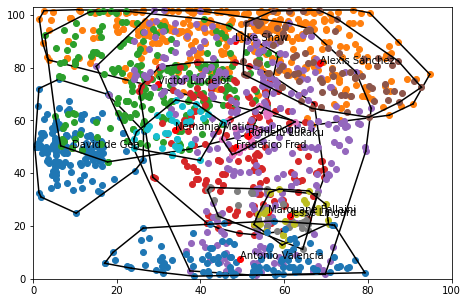

In [262]:
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from scipy import stats

fig=plt.figure()
fig.set_size_inches(7.5, 5)
plt.xlim(0, 100)
plt.ylim(0, 103)

#len_clusters = []

for p in Players_Lei:
    x = df_manUtd_poss.loc[df_manUtd_poss['player_id'] == p['player_id']]['X'].to_numpy()
    y = df_manUtd_poss.loc[df_manUtd_poss['player_id'] == p['player_id']]['Y'].to_numpy()
    if len(x) < 145:
        pass
    else:
        X = np.column_stack((x, y))
        model = DBSCAN(eps=10, min_samples=20).fit(X)
        #clusters = X[model.labels_ != -1]
        labels = list(model.labels_)
        labels = list(filter(lambda a: a != -1, labels))
        #print(len(labels))
        labels = np.array(labels) 
        maxEle = np.bincount(labels).argmax()
        clusters = X[model.labels_ == maxEle]
        print(len(clusters))
        
        hull = ConvexHull(clusters)
        plt.plot(clusters[:,0], clusters[:,1], 'o')
        plt.plot(np.mean(clusters[:,0]) , np.mean(clusters[:,1]),'ro') 
        plt.annotate(p['Name'], (np.mean(clusters[:,0]), np.mean(clusters[:,1])))
        for simplex in hull.simplices:
            plt.plot(clusters[simplex, 0], clusters[simplex, 1], 'k-')
        
    
plt.show()

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
import random

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

(-32.61505773201412, 26.86826465165765, 28.286573178880808, 19.058033067049415, -43.89571272980226) (-31.018209860520994, 26.121348639524715, 28.855739700492695, 61.991312891174886, 115.28315727214327)
(47.4149004071266, 53.100641371606606, 84.63799611122494, -7.186118515522345) (72.32394870893097, 72.99981977001661, 149.21392636064354, 134.14565622327015)
(19.058033067049415, 43.85247329776122, 47.4149004071266, -7.186118515522345, -43.89571272980226) (61.991312891174886, 67.96431799871935, 72.32394870893097, 134.14565622327015, 115.28315727214327)
(42.83788401178139, 31.02092862456282, 63.07120013984489, 64.81088740242865) (56.801637750754665, 30.803897499065044, 40.896460190281196, 41.77199012782789)
(43.48145238802162, 43.85247329776122, 47.4149004071266, 53.100641371606606, 91.07729492298417, 66.45614401946877) (61.817666177241094, 67.96431799871935, 72.32394870893097, 72.99981977001661, 49.486173524769676, 42.320497693253685)
(53.100641371606606, 91.07729492298417, 172.9386612877

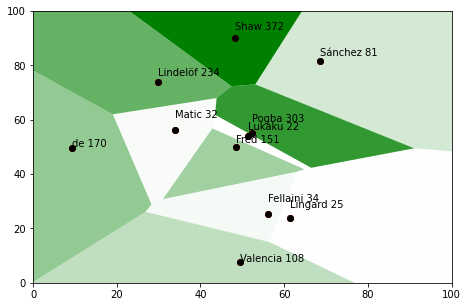

In [273]:
fig=plt.figure()
fig.set_size_inches(7.5, 5)
ax = fig.add_subplot(111)

j = 0
#len_clusters = []
pointsX = []
pointsY = []
alph = []
for p in Players_Lei:
    x = df_manUtd_poss.loc[df_manUtd_poss['player_id'] == p['player_id']]['X'].to_numpy()
    y = df_manUtd_poss.loc[df_manUtd_poss['player_id'] == p['player_id']]['Y'].to_numpy()
    if len(x) < 145:
        pass
    else:
        X = np.column_stack((x, y))
        model = DBSCAN(eps=10, min_samples=20).fit(X)
        #clusters = X[model.labels_ != -1]
        labels = list(model.labels_)
        labels = list(filter(lambda a: a != -1, labels))
        labels = np.array(labels) 
        maxEle = np.bincount(labels).argmax()
        clusters = X[model.labels_ == maxEle]
        alph.append((len(clusters)-22)/350)
        plt.plot(np.mean(clusters[:,0]) , np.mean(clusters[:,1]),'ro') 
        strng = p['Name'].split(' ')[1] + ' ' + str(len(clusters))
        plt.annotate(strng, (np.mean(clusters[:,0]), np.mean(clusters[:,1])), (np.mean(clusters[:,0]), np.mean(clusters[:,1])+random.uniform(0, 5)))
        pointsX.append(np.mean(clusters[:,0]))
        pointsY.append(np.mean(clusters[:,1]))
        #pointsX.append(clusters[:,0])
        #pointsY.append(clusters[:,1])
        #sns.kdeplot(clusters[:,0], clusters[:,1], shade = "True", color = (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), (alph-48)/400), n_levels = 10)
        #sns.heatmap(clusters)

points = np.column_stack((pointsX, pointsY))

vor = Voronoi(points)

# plot
regions, vertices = voronoi_finite_polygons_2d(vor)
#print "--"
#print regions
#print "--"
#print vertices

# colorize
for i in range(len(regions)):
    polygon = vertices[regions[i]]
    print(*zip(*polygon))
    alp = alph[i]
    plt.fill(*zip(*polygon), "g", alpha=alp)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim([0,100]), plt.ylim([0,100])

plt.show()